In [1]:
from pathlib import Path
from types import SimpleNamespace
import cv2
from matplotlib import pyplot as plt
from pprint import pprint


config_dict = {
    'L2CSNET_WEIGHTS': '../models/L2CSNet_gaze360.pkl',
    'EYE_STATE_MODEL_WEIGHTS': '../models/eye_state_classifier.h5',
    'SHAPE_PREDICTOR': '../models/shape_predictor_68_face_landmarks.dat'
}

config = SimpleNamespace(**{key: Path(value) for key, value in config_dict.items()})

In [2]:
# img_path = "../input/test_4.png"
img_path = "../input/test_2.jpg"

# 1. Gazes

In [3]:
from face_analysis.gazes import Pipeline as GazesPipeline
from face_analysis.gazes import render as GazesRender

gaze_pipeline = GazesPipeline(
    weights=config.L2CSNET_WEIGHTS,
    arch='ResNet50', # or "ResNet18", "ResNet34", "ResNet101", "ResNet152"
    detector="retinaface", # or "mtcnn"
    device="cuda", # or "cpu"
)

img_in = cv2.imread(img_path)
results = gaze_pipeline.step(img_in)
pprint(vars(results))

{'bboxes': array([[339.0647 ,  60.07495, 407.87875, 151.52264],
       [222.37344,  71.61143, 284.0312 , 162.20805]], dtype=float32),
 'landmarks': array([[[366.5524 ,  98.34928],
        [394.9942 ,  96.0581 ],
        [388.44452, 114.15899],
        [371.54556, 129.74197],
        [394.68924, 128.01501]],

       [[246.83359, 114.30887],
        [273.6025 , 113.26089],
        [265.07208, 131.37032],
        [247.58012, 142.37903],
        [268.8093 , 141.82117]]], dtype=float32),
 'looking_at_camera': array([False, False]),
 'pitch': array([ 0.56581974, -1.0774524 ], dtype=float32),
 'scores': array([0.9990088 , 0.99763143], dtype=float32),
 'yaw': array([-0.07808815, -0.888846  ], dtype=float32)}


In [4]:
gaze_df = results.to_dataframe()
gaze_df

,face_bboxes,landmarks,looking_at_camera,pitch,scores,yaw
0,"[[339.0647, 60.07495, 407.87875, 151.52264]]","[[[366.5524, 98.34928], [394.9942, 96.0581], [...",False,0.565820,0.999009,-0.078088
1,"[[222.37344, 71.61143, 284.0312, 162.20805]]","[[[246.83359, 114.30887], [273.6025, 113.26089...",False,-1.077452,0.997631,-0.888846


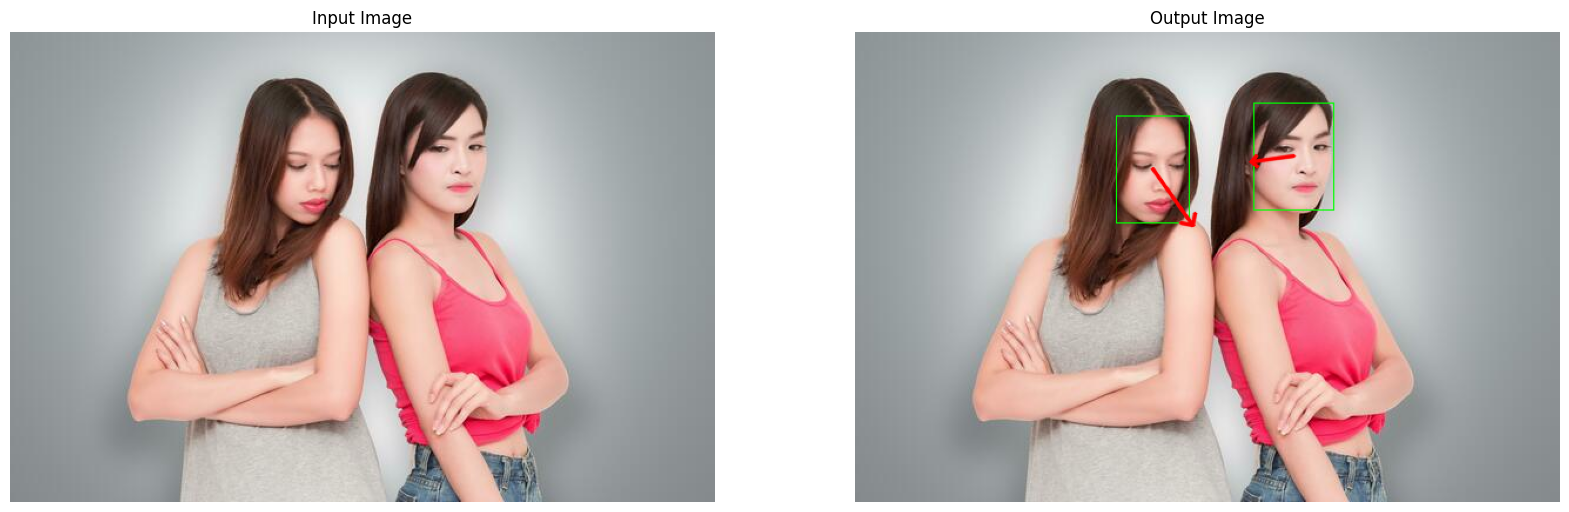

In [5]:
img_out = GazesRender(img_in, results)

figsize=(20, 12)
plt.figure(figsize=figsize)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.title("Output Image")
plt.axis('off')

plt.show()

# Eye State

In [6]:
from face_analysis.eyes import Pipeline as EyesPipeline
from face_analysis.eyes import render as eyes_render

eye_pipeline = EyesPipeline(
    weights=config.EYE_STATE_MODEL_WEIGHTS,
    shape_predictor=config.SHAPE_PREDICTOR,
    detector="retinaface", # or "dlib"
    device="cuda", # or "cpu"
)

img_in = cv2.imread(img_path)
results = eye_pipeline.step(img_in)
pprint(vars(results))

INFO:face_analysis.eyes.utils:No GPU found, falling back to CPU
INFO:face_analysis.eyes.utils:Using CPU for processing


{'bboxes': array([[339.0599 ,  60.07134, 407.87766, 151.51999],
       [222.37524,  71.61229, 284.02713, 162.20728]], dtype=float32),
 'landmarks': array([[[366.55148,  98.34667],
        [394.9965 ,  96.05943],
        [388.44577, 114.15655],
        [371.54196, 129.73663],
        [394.6891 , 128.01303]],

       [[246.83603, 114.31005],
        [273.6029 , 113.26362],
        [265.07605, 131.36926],
        [247.58223, 142.37859],
        [268.80997, 141.82208]]], dtype=float32),
 'left_confidences': [0.8495241403579712, 0.9999241828918457],
 'left_states': ['open', 'closed'],
 'right_confidences': [0.5720351338386536, 1.0],
 'right_states': ['closed', 'closed'],
 'scores': array([0.9990088 , 0.99763334], dtype=float32)}


In [7]:
eyes_df = results.to_dataframe()
eyes_df

,face_bboxes,landmarks,left_state,right_state,left_confidence,right_confidence,combined_state,is_blinking,scores
0,"[[339.0599, 60.07134, 407.87766, 151.51999]]","[[[366.55148, 98.34667], [394.9965, 96.05943],...",open,closed,0.849524,0.572035,partially_open,False,0.999009
1,"[[222.37524, 71.61229, 284.02713, 162.20728]]","[[[246.83603, 114.31005], [273.6029, 113.26362...",closed,closed,0.999924,1.000000,closed,True,0.997633


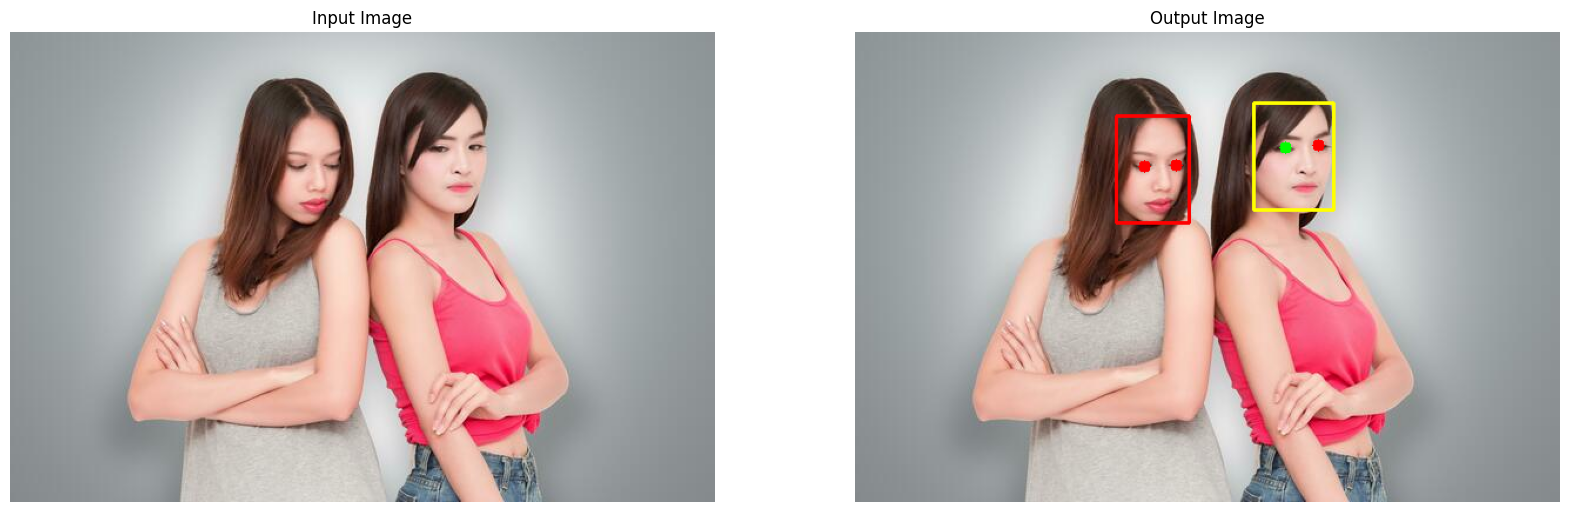

In [8]:
img_out = eyes_render(img_in, results)

figsize=(20, 12)
plt.figure(figsize=figsize)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.title("Output Image")
plt.axis('off')

plt.show()

# Emotion

In [ ]:
from face_analysis.emotions import Pipeline as EmotionsPipeline
from face_analysis.emotions import render as emotions_render

emotion_pipeline = EmotionsPipeline(
    detector= "retinaface", # or "mtcnn", or "cascade"
    device= "cpu",
)

img_in = cv2.imread(img_path)
results = emotion_pipeline.step(img_in)
pprint(vars(results))

INFO:emotions.utils:Using CPU for processing


{'boxes': [(328, 60, 91, 91), (208, 71, 91, 91)],
 'emotions': [{'angry': 0.029315736144781113,
               'disgust': 4.644750333682168e-06,
               'fear': 0.004823758266866207,
               'happy': 0.026723235845565796,
               'neutral': 0.8315128684043884,
               'sad': 0.10733038932085037,
               'surprise': 0.00028937580646015704},
              {'angry': 0.009826939553022385,
               'disgust': 5.875187343917787e-05,
               'fear': 0.09469038993120193,
               'happy': 0.006451480556279421,
               'neutral': 0.08236965537071228,
               'sad': 0.8054774403572083,
               'surprise': 0.00112522195558995}],
 'scores': [0.8315128684043884, 0.8054774403572083]}


In [10]:
emotion_df = results.to_dataframe()
emotion_df

,face_bboxes,top_emotion,top_score,emotion_scores
0,"(328, 60, 91, 91)",neutral,0.831513,"{'angry': 0.029315736144781113, 'disgust': 4.6..."
1,"(208, 71, 91, 91)",sad,0.805477,"{'angry': 0.009826939553022385, 'disgust': 5.8..."


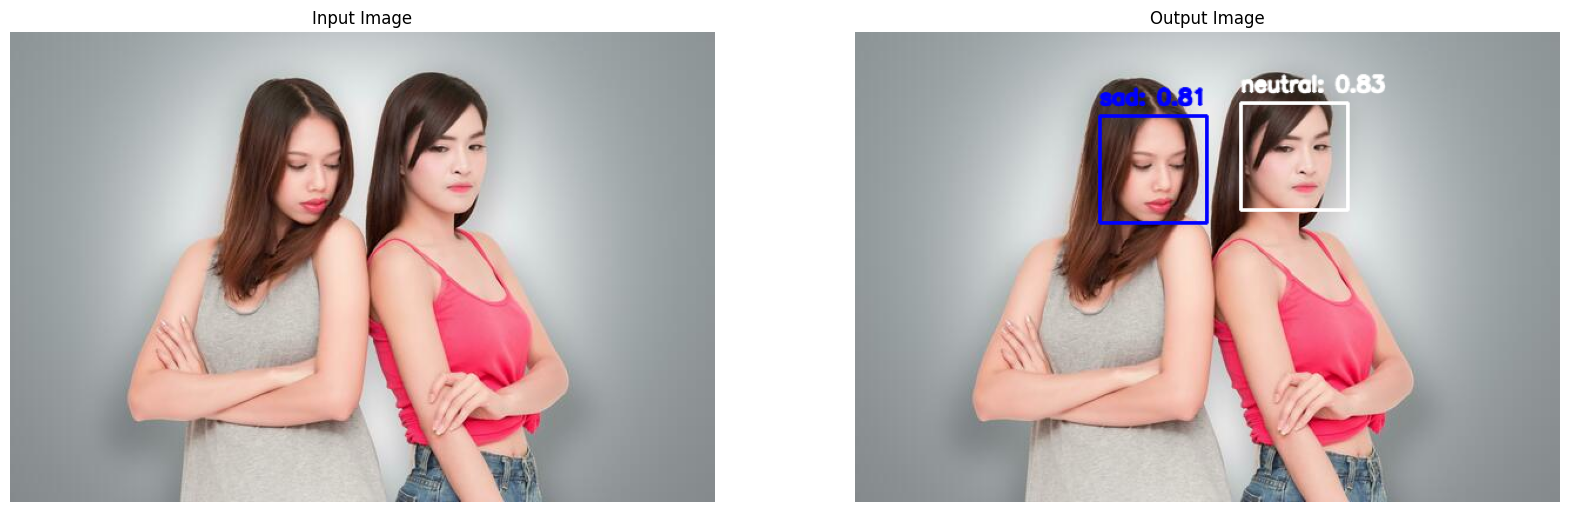

In [11]:
img_out = emotions_render(img_in, results)

figsize=(20, 12)
plt.figure(figsize=figsize)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.title("Output Image")
plt.axis('off')

plt.show()